<font size="5" color="#0000dd">第 0 階段: 匯入模組</font>

In [50]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import random

In [51]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop, Adam
from keras.regularizers import l1, l2, l1_l2

In [52]:
from sklearn.model_selection import train_test_split

<font size="5" color="#0000dd">第 1 階段: 資料匯入與前處理</font>

In [53]:
# Variety dict
dict_labels = {'daisy':0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4} 
num_classes = len(dict_labels)

In [55]:
# import data
dir_data = '../Finalexam/'

dir_train = dir_data+"train"
dir_test = dir_data+"test"
# for i in Variety:
#     path_data = os.path.join(dir_data+i, )

In [56]:
images = []
images_pixel = []
images_label = []
for i in os.listdir(dir_train):
    for j in os.listdir(dir_train+"/"+i):
        path_data = dir_train+"/"+i+"/"+j
        images = Image.open(path_data)
        images = images.resize((64,64),Image.ANTIALIAS)
        # append to list
        images_pixel.append(np.asarray(images))
        images_label.append(dict_labels[i])

In [57]:
# 將images的pixel跟labe組成tuple
train = (images_pixel, images_label)

In [58]:
# 確認train的數據data數量正確
# 確認laebel各佔多少個
x_train, y_train= train
print("length of train data:",len(x_train))

labels_count = []
for i in range(num_classes):
    labels_count.append(y_train.count(i))
print("Numbers of each label:",labels_count)


length of train data: 2823
Numbers of each label: [500, 687, 515, 488, 633]


In [59]:
# 這邊隨便看一張圖可以看到h*w*channel是(64*64*3)
x_train[1].shape

(64, 64, 3)

In [60]:
# 資料前處理的function
def preproc_x(x):
    # input, ([batch_size, height, width, color_channels])
    x = np.reshape(x, (-1, 64, 64, 3))
    x = x.astype('float32')
    x = x/255.
    return x

def preproc_y(y, num_classes=num_classes):
    y = np.asarray(y)
    print(y.shape[-1])
#     if y.shape[-1] == 1:
#         print("TRUE")
    y = keras.utils.to_categorical(y, num_classes)
    return y

In [61]:
x_train = preproc_x(x_train)
y_train = preproc_y(y_train)

2823


In [62]:
randnum = random.randint(0,100)
random.seed(randnum)
random.shuffle(x_train)
random.seed(randnum)
random.shuffle(y_train)

In [63]:
print("tyep of x_train:",type(x_train))
print("tyep of y_train:",type(y_train))
print("-----------------------------------")
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)

tyep of x_train: <class 'numpy.ndarray'>
tyep of y_train: <class 'numpy.ndarray'>
-----------------------------------
shape of x_train: (2823, 64, 64, 3)
shape of y_train: (2823, 5)


<font size="5" color="#0000dd">第 2 階段: 超參數設定</font>

In [70]:
# 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 32
L2_RATIO = 1e-4

<font size="5" color="#0000dd">第 3 階段: 架構神經網絡</font>

In [71]:
x_train.shape[1:]

(64, 64, 3)

In [74]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:],
                kernel_regularizer=l2(L2_RATIO)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(L2_RATIO)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(L2_RATIO)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(L2_RATIO)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=l2(L2_RATIO)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_42 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_43 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 31, 31, 32)        0         
__________

<font size="5" color="#0000dd">第 4 階段: Model compile & fit </font>

In [75]:
optimizer = RMSprop(lr=LEARNING_RATE, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [76]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_split=0.2,
                    shuffle=True)

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Train on 2258 samples, validate on 565 samples
Epoch 1/50
2258/2258 [==============================] - 53s 23ms/step - loss: 5.8806 - acc: 0.6125 - val_loss: 10.7318 - val_acc: 0.2920
Epoch 2/50
2258/2258 [==============================] - 51s 22ms/step - loss: 5.2979 - acc: 0.6541 - val_loss: 11.2692 - val_acc: 0.2991
Epoch 3/50
2258/2258 [==============================] - 51s 22ms/step - loss: 4.1460 - acc: 0.7228 - val_loss: 10.2950 - val_acc: 0.3628
Epoch 4/50
2258/2258 [==============================] - 51s 22ms/step - loss: 3.9524 - acc: 0.7329 - val_loss: 11.4007 - val_acc: 0.2938
Epoch 5/50
2258/2258 [==============================] - 51s 22ms/step - loss: 3.6516 - acc: 0.7569 - val_loss: 10.7258 - val_acc: 0.3345
Epoch 6/50
2258/2258 [==============================] - 51s 22ms/step - loss: 4.0240 - acc: 0.7356 - val_loss: 11.1441 - val_acc: 0.3080
Epoch 7/50
2258/2258 [==============================] - 51s 22ms/step - loss: 3.5743 - acc: 0.7679 - val_loss: 10.5275 - val_acc: 0

<font size="5" color="#0000dd">第 5 階段: 結果評估</font>

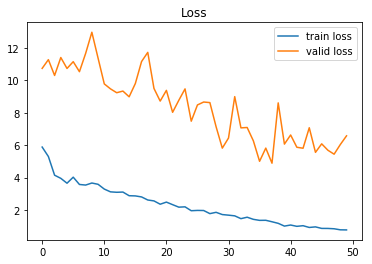

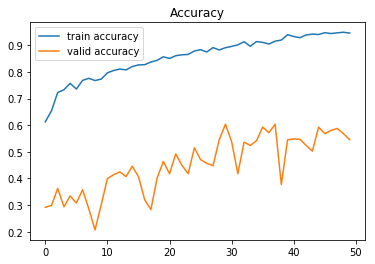

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

<font size="5" color="#0000dd">第 6 階段: 預測與匯出</font>

In [78]:
# 預測
testimages_pixel = []
for i in os.listdir(dir_test):
    path_data = dir_test+"/"+i
    testimages = Image.open(path_data)
    testimages = testimages.resize((64,64),Image.ANTIALIAS)
    # append to list
    testimages_pixel.append(np.asarray(testimages))

In [79]:
x_test = preproc_x(testimages_pixel)

In [80]:
x_test.shape

(2000, 64, 64, 3)

In [81]:
x_test.shape[1:]

(64, 64, 3)

In [82]:
predictions = model.predict_classes(x_test)

In [83]:
predictions

array([2, 1, 2, ..., 0, 1, 1], dtype=int64)

In [84]:
submission = pd.read_csv('../Finalexam/sample_submission.csv')
submit = submission[['id']]
submit['flower_class'] = predictions

In [85]:
 submit.to_csv('../Finalexam/predictions.csv', encoding='utf-8',index=False)